In [311]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# 노트북 안에 그래프 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 gglot 스타일 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams['font.family'] = 'NanumGothic'

## 건국대 충주 실습농장 평사

### 2021-06-07 ~ 2021-06-30 기간 동안 수집된 데이터

In [312]:
# train = pd.read_csv("data/Sensor/Sensor_data.csv", parse_dates=["datetime"])
df = pd.read_csv("data/Sensor/Sensor_data.csv")
df.shape

(38924, 7)

In [313]:
df.head()

,수집시간,수집장비ID,축사번호,모듈ID,센서타입,측정값,센서시간
0,2021-06-30 23:58:48,GW01,1,1,humidity,99.89995,20210630235847
1,2021-06-30 23:58:48,GW01,1,1,temp,21.09999,20210630235847
2,2021-06-30 23:58:21,GW01,1,1,co2,402.89000,20210630235819
3,2021-06-30 23:58:21,GW01,1,1,nh3,4.38000,20210630235819
4,2021-06-30 23:56:48,GW01,1,1,humidity,99.89994,20210630235647


In [314]:
df.columns = ['Time','Collecting device ID', 'Barn number', 'Module ID', 'Type', 'Value', 'Sensor time']
df

,Time,Collecting device ID,Barn number,Module ID,Type,Value,Sensor time
0,2021-06-30 23:58:48,GW01,1,1,humidity,99.899950,20210630235847
1,2021-06-30 23:58:48,GW01,1,1,temp,21.099990,20210630235847
2,2021-06-30 23:58:21,GW01,1,1,co2,402.890000,20210630235819
3,2021-06-30 23:58:21,GW01,1,1,nh3,4.380000,20210630235819
4,2021-06-30 23:56:48,GW01,1,1,humidity,99.899940,20210630235647
...,...,...,...,...,...,...,...
38919,2021-06-10 12:27:16,GW01,1,1,humidity,45.639000,20210610122714
38920,2021-06-10 12:23:31,GW01,1,1,nh3,11.934230,20210610122330
38921,2021-06-10 12:23:31,GW01,1,1,co2,409.215100,20210610122330
38922,2021-06-10 12:16:58,GW01,1,1,co2,402.246300,20210610121657


In [315]:
df.isnull().sum()

Time                    0
Barn number             0
Module ID               0
Type                    0
Value                   0
Sensor time             0
dtype: int64

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38924 entries, 0 to 38923
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time                  38924 non-null  object 
 1   Collecting device ID  38924 non-null  object 
 2   Barn number           38924 non-null  int64  
 3   Module ID             38924 non-null  int64  
 4   Type                  38924 non-null  object 
 5   Value                 38924 non-null  float64
 6   Sensor time           38924 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.1+ MB


In [317]:
df['Time'] = pd.to_datetime(df['Time'])

In [318]:
df["year"] = df["Time"].dt.year
df["month"] = df["Time"].dt.month
df["day"] = df["Time"].dt.day
df["hour"] = df["Time"].dt.hour
df["minute"] = df["Time"].dt.minute
df["second"] = df["Time"].dt.second

df.shape

(38924, 13)

In [319]:
df.head()

,Time,Collecting device ID,Barn number,Module ID,Type,Value,Sensor time,year,month,day,hour,minute,second
0,2021-06-30 23:58:48,GW01,1,1,humidity,99.89995,20210630235847,2021,6,30,23,58,48
1,2021-06-30 23:58:48,GW01,1,1,temp,21.09999,20210630235847,2021,6,30,23,58,48
2,2021-06-30 23:58:21,GW01,1,1,co2,402.89000,20210630235819,2021,6,30,23,58,21
3,2021-06-30 23:58:21,GW01,1,1,nh3,4.38000,20210630235819,2021,6,30,23,58,21
4,2021-06-30 23:56:48,GW01,1,1,humidity,99.89994,20210630235647,2021,6,30,23,56,48


In [320]:
data = df[['Time', 'Collecting device ID', 'Type', 'Value']]

In [321]:
data

,Time,Collecting device ID,Type,Value
0,2021-06-30 23:58:48,GW01,humidity,99.899950
1,2021-06-30 23:58:48,GW01,temp,21.099990
2,2021-06-30 23:58:21,GW01,co2,402.890000
3,2021-06-30 23:58:21,GW01,nh3,4.380000
4,2021-06-30 23:56:48,GW01,humidity,99.899940
...,...,...,...,...
38919,2021-06-10 12:27:16,GW01,humidity,45.639000
38920,2021-06-10 12:23:31,GW01,nh3,11.934230
38921,2021-06-10 12:23:31,GW01,co2,409.215100
38922,2021-06-10 12:16:58,GW01,co2,402.246300


In [322]:
pivoted = data.pivot(['Time','Collecting device ID'], 'Type', 'Value')

#pivoted = data.pivot('Sensor time', 'Type', 'Vlaue')
pivoted = pivoted.reset_index()

In [323]:
pivoted

Type,Time,Collecting device ID,co2,humidity,nh3,temp
0,2021-06-10 12:16:58,GW01,402.2463,NaN,3.526615,NaN
1,2021-06-10 12:23:31,GW01,409.2151,NaN,11.934230,NaN
2,2021-06-10 12:27:16,GW01,NaN,45.63900,NaN,28.95933
3,2021-06-10 12:56:05,GW01,NaN,48.82544,NaN,29.32883
4,2021-06-10 12:58:39,GW01,404.0543,NaN,5.793288,NaN
...,...,...,...,...,...,...
18936,2021-06-30 23:54:48,GW01,NaN,99.89994,NaN,21.10168
18937,2021-06-30 23:56:21,GW01,402.8900,NaN,4.390000,NaN
18938,2021-06-30 23:56:48,GW01,NaN,99.89994,NaN,21.10338
18939,2021-06-30 23:58:21,GW01,402.8900,NaN,4.380000,NaN


In [324]:
pivoted_sorted = pivoted.sort_values(by='Time' ,ascending=True)

In [325]:
pivoted_sorted = pivoted_sorted.drop(columns=["nh3"])
pivoted_sorted["year"] = pivoted_sorted["Time"].dt.year
pivoted_sorted["month"] = pivoted_sorted["Time"].dt.month
pivoted_sorted["day"] = pivoted_sorted["Time"].dt.day
pivoted_sorted["hour"] = pivoted_sorted["Time"].dt.hour
pivoted_sorted

Type,Time,Collecting device ID,co2,humidity,temp,year,month,day,hour
0,2021-06-10 12:16:58,GW01,402.2463,NaN,NaN,2021,6,10,12
1,2021-06-10 12:23:31,GW01,409.2151,NaN,NaN,2021,6,10,12
2,2021-06-10 12:27:16,GW01,NaN,45.63900,28.95933,2021,6,10,12
3,2021-06-10 12:56:05,GW01,NaN,48.82544,29.32883,2021,6,10,12
4,2021-06-10 12:58:39,GW01,404.0543,NaN,NaN,2021,6,10,12
...,...,...,...,...,...,...,...,...,...
18936,2021-06-30 23:54:48,GW01,NaN,99.89994,21.10168,2021,6,30,23
18937,2021-06-30 23:56:21,GW01,402.8900,NaN,NaN,2021,6,30,23
18938,2021-06-30 23:56:48,GW01,NaN,99.89994,21.10338,2021,6,30,23
18939,2021-06-30 23:58:21,GW01,402.8900,NaN,NaN,2021,6,30,23


In [326]:
# grouped_df = pivoted_sorted.groupby(pd.Grouper(key='Time' ,freq='1h'))[['Collecting device ID','co2','humidity','temp']]. \
# agg({'Collecting device ID' : 'max','co2' : ['mean','median','std'],'humidity' : ['mean','median','std'],
#      'temp' : ['mean','median','std']})

grouped_df_mean = pivoted_sorted.groupby(pd.Grouper(key='Time' ,freq='1h')).mean()

In [327]:
grouped_df_mean

Type,co2,humidity,temp,year,month,day,hour
Time,,,,,,,
2021-06-10 12:00:00,405.171900,47.232220,29.144080,2021.0,6.0,10.0,12.0
2021-06-10 13:00:00,400.118973,43.524103,30.132948,2021.0,6.0,10.0,13.0
2021-06-10 14:00:00,400.041593,41.219764,30.595464,2021.0,6.0,10.0,14.0
2021-06-10 15:00:00,400.053593,42.046431,30.239883,2021.0,6.0,10.0,15.0
2021-06-10 16:00:00,400.197657,45.121034,29.507565,2021.0,6.0,10.0,16.0
...,...,...,...,...,...,...,...
2021-06-30 19:00:00,402.696667,99.781939,24.828546,2021.0,6.0,30.0,19.0
2021-06-30 20:00:00,402.187333,99.899941,23.243017,2021.0,6.0,30.0,20.0
2021-06-30 21:00:00,402.005333,99.899941,22.113639,2021.0,6.0,30.0,21.0


In [328]:
co2_data = pd.DataFrame(grouped_df_mean['co2'], columns=['co2'])
humidity_data = pd.DataFrame(grouped_df_mean['humidity'], columns=['humidity'])
temp_data = pd.DataFrame(grouped_df_mean['temp'], columns=['temp'])

co2_data = co2_data.dropna(axis=0)
humidity_data = humidity_data.dropna(axis=0)
temp_data = temp_data.dropna(axis=0)

co2_data_reset_index = co2_data.reset_index()
humidity_data_reset_index = humidity_data.reset_index()
temp_data_reset_index = temp_data.reset_index()

#humidity_data_reset_index = humidity_data_reset_index.set_index('Time')

co2_data_reset_index['year'] = co2_data_reset_index['Time'].dt.year
co2_data_reset_index

co2_data_reset_index['Date'] = pd.to_datetime(co2_data_reset_index['Time'].dt.year.astype(str) + co2_data_reset_index['Time'].dt.month.astype(str) + co2_data_reset_index['Time'].dt.day.astype(str), format='%Y%m%d').dt.strftime('%Y-%m-%d')
humidity_data_reset_index['Date'] = pd.to_datetime(humidity_data_reset_index['Time'].dt.year.astype(str) + humidity_data_reset_index['Time'].dt.month.astype(str) + humidity_data_reset_index['Time'].dt.day.astype(str), format='%Y%m%d').dt.strftime('%Y-%m-%d')
temp_data_reset_index['Date'] = pd.to_datetime(temp_data_reset_index['Time'].dt.year.astype(str) + temp_data_reset_index['Time'].dt.month.astype(str) + temp_data_reset_index['Time'].dt.day.astype(str), format='%Y%m%d').dt.strftime('%Y-%m-%d')


Text(0, 0.5, 'Value')

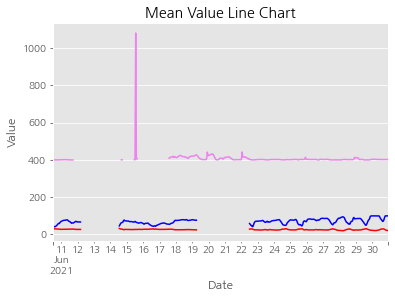

In [371]:
ax_line = grouped_df_mean['co2'].plot.line(color='violet')
ax_line = grouped_df_mean['humidity'].plot.line(color='blue')
ax_line = grouped_df_mean['temp'].plot.line(color='red')

ax_line.set_title('Mean Value Line Chart')
ax_line.set_xlabel("Date")
ax_line.set_ylabel("Value")


Text(0, 0.5, 'Value')

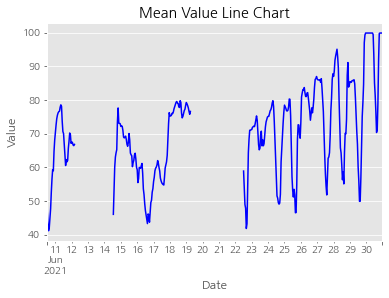

In [373]:
ax_line = grouped_df_mean['humidity'].plot.line(color='blue')

ax_line.set_title('Mean Value Line Chart')
ax_line.set_xlabel("Date")
ax_line.set_ylabel("Value")

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(-50.0, 0, '2021-06-28'),
  Text(0.0, 0, '2021-06-10'),
  Text(50.0, 0, '2021-06-14'),
  Text(100.0, 0, '2021-06-17'),
  Text(150.0, 0, '2021-06-19'),
  Text(200.0, 0, '2021-06-24'),
  Text(250.0, 0, '2021-06-26'),
  Text(300.0, 0, '2021-06-28'),
  Text(350.0, 0, '2021-06-30'),
  Text(400.0, 0, '')])

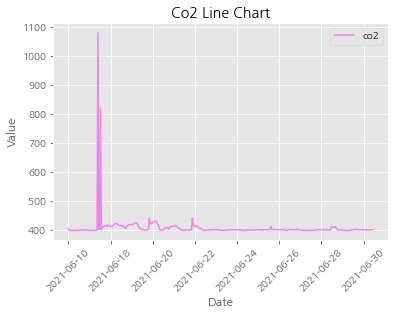

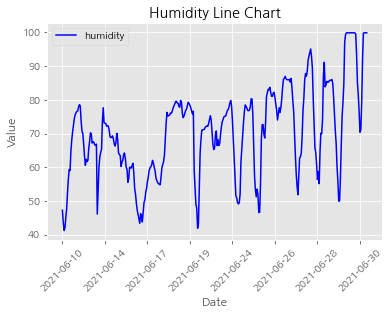

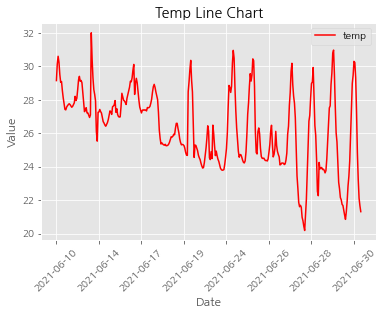

In [374]:
co2_line = co2_data_reset_index.plot.line(x='Date',y='co2', color='violet')

co2_line.set_title('Co2 Line Chart')
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation=45)

humidity_line = humidity_data_reset_index.plot.line(x='Date',y='humidity', color='blue')

humidity_line.set_title('Humidity Line Chart')
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation=45)

temp_line = temp_data_reset_index.plot.line(x='Date',y='temp', color='red')

temp_line.set_title('Temp Line Chart')
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation=45)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(-50.0, 0, '2021-06-28'),
  Text(0.0, 0, '2021-06-10'),
  Text(50.0, 0, '2021-06-14'),
  Text(100.0, 0, '2021-06-17'),
  Text(150.0, 0, '2021-06-19'),
  Text(200.0, 0, '2021-06-24'),
  Text(250.0, 0, '2021-06-26'),
  Text(300.0, 0, '2021-06-28'),
  Text(350.0, 0, '2021-06-30'),
  Text(400.0, 0, '')])

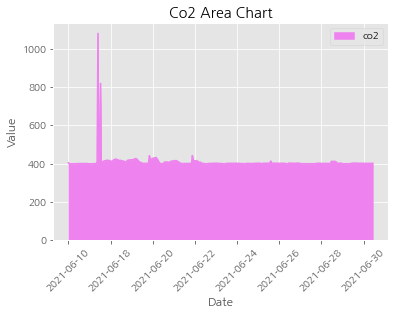

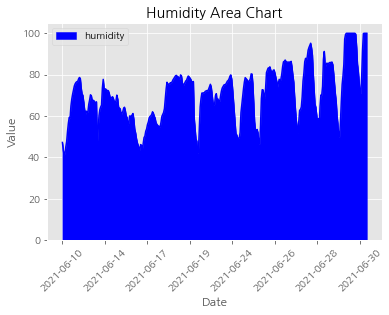

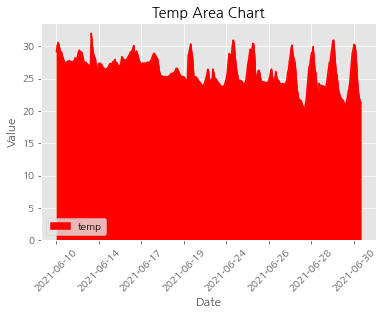

In [375]:
co2_bar = co2_data_reset_index.plot.area(x='Date',y='co2',color='violet')

co2_bar.set_title('Co2 Area Chart')
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation=45)

humidity_bar = humidity_data_reset_index.plot.area(x='Date',y='humidity',color='blue')

humidity_bar.set_title('Humidity Area Chart')
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation=45)

temp_bar = temp_data_reset_index.plot.area(x='Date',y='temp', color='red')

temp_bar.set_title('Temp Area Chart')
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation=45)

[Text(0.5, 0, 'Value'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Temp Hitstogram Chart')]

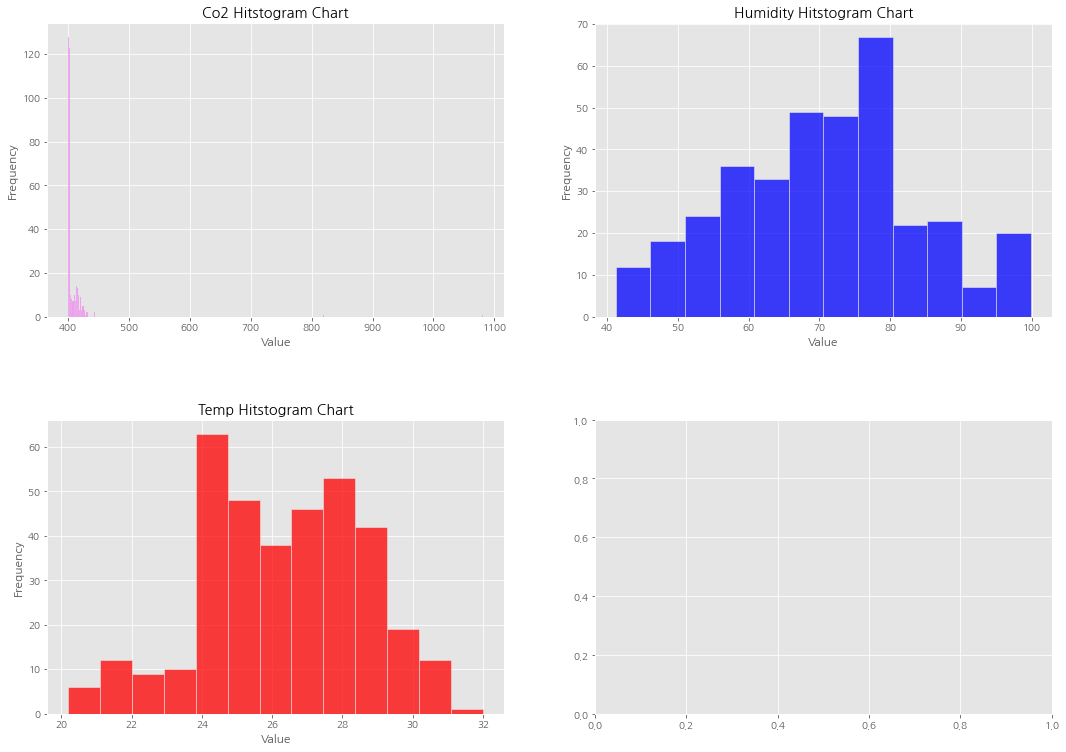

In [377]:
# grouped_df_mean_reset_index = grouped_df_mean.reset_index()
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18, 8)
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=1.3, wspace=0.2, hspace=0.35)

co2_barplot = sns.histplot(data=co2_data_reset_index, x="co2", ax=ax1, color='violet')

humidity_barplot = sns.histplot(data=humidity_data_reset_index, x="humidity", ax=ax2, color='blue')

temp_barplot = sns.histplot(data=temp_data_reset_index, x="temp", ax=ax3, color='red')

ax1.set(xlabel="Value", ylabel="Frequency", title="Co2 Hitstogram Chart")
ax2.set(xlabel="Value", ylabel="Frequency", title="Humidity Hitstogram Chart")
ax3.set(xlabel="Value", ylabel="Frequency", title="Temp Hitstogram Chart")


[Text(0, 0, '2021-06-10'),
 Text(1, 0, '2021-06-11'),
 Text(2, 0, '2021-06-12'),
 Text(3, 0, '2021-06-14'),
 Text(4, 0, '2021-06-15'),
 Text(5, 0, '2021-06-16'),
 Text(6, 0, '2021-06-17'),
 Text(7, 0, '2021-06-18'),
 Text(8, 0, '2021-06-19'),
 Text(9, 0, '2021-06-22'),
 Text(10, 0, '2021-06-23'),
 Text(11, 0, '2021-06-24'),
 Text(12, 0, '2021-06-25'),
 Text(13, 0, '2021-06-26'),
 Text(14, 0, '2021-06-27'),
 Text(15, 0, '2021-06-28'),
 Text(16, 0, '2021-06-29'),
 Text(17, 0, '2021-06-30')]

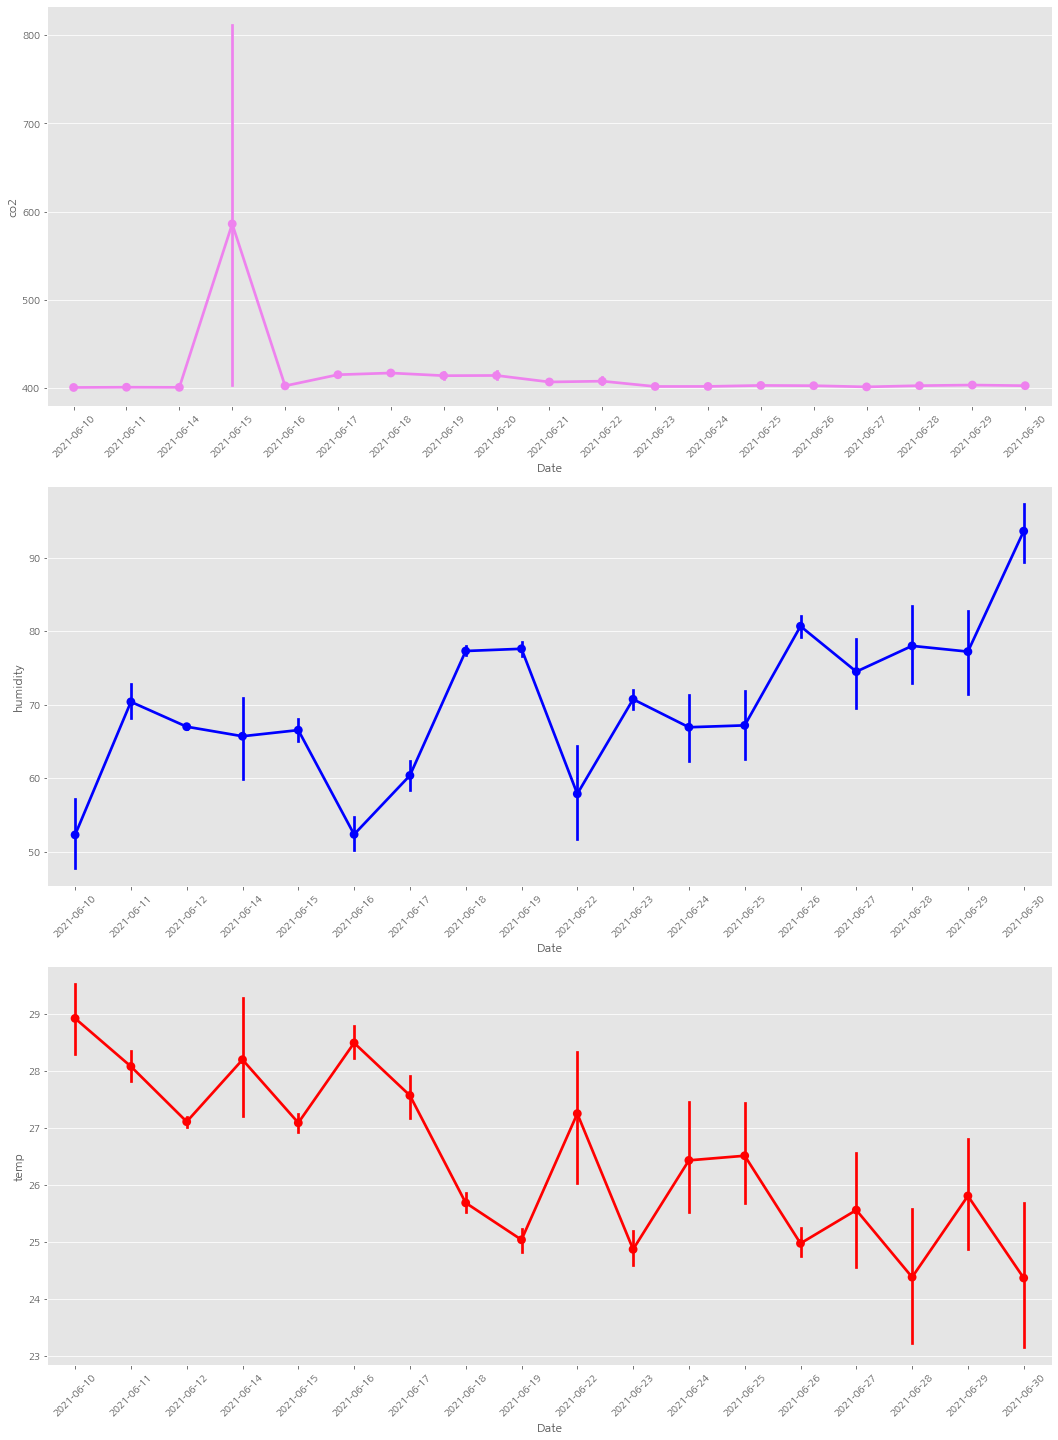

In [378]:
fig,(ax1,ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(18,25)

co2_point = sns.pointplot(data=co2_data_reset_index, x="Date", y="co2", ax=ax1, color='violet')
co2_point.set_xticklabels(co2_point.get_xticklabels(),rotation = 45)

humidity_point = sns.pointplot(data=humidity_data_reset_index, x="Date", y="humidity", ax=ax2, color='blue')
humidity_point.set_xticklabels(humidity_point.get_xticklabels(),rotation = 45)

temp_point = sns.pointplot(data=temp_data_reset_index, x="Date", y="temp", ax=ax3, color='red')
temp_point.set_xticklabels(temp_point.get_xticklabels(),rotation = 45)